# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score
import json
import warnings
import os
import ast

sns.set()
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
config_url = '../../hourlyAPI/config/coins/coins_to_track.json'
f = open(config_url)
tracked_coins = ast.literal_eval(json.load(f)['coins'])
f.close()
print(tracked_coins)

['DCR', 'CTSI', 'BTC', 'FTM', 'TRB', 'MANA', 'BAT', 'GXS', 'STORM', 'OMG', 'STMX', 'WAN', 'IOST', 'NMR', 'FET', 'ICX', 'MATIC', 'SKL', 'VET', 'KEEP', 'ALGO', 'DOGE', 'AXS', 'TRX', 'BNT', 'SAND', 'RUNE', 'HBAR', 'WAVES', 'FUN', 'ARPA', 'CREAM', 'ETH', 'DOCK', 'NEXO', 'SRM', 'LTO', 'ETC', 'BTS', 'DOT', 'VTH', 'EOS', 'ONT', 'AGLD', 'NKN', 'CRV', 'CELR', 'CRO', 'OCEAN', 'CAKE', 'MDX', 'CELO', 'SXP', 'RVN', 'QTUM', 'ZEC', 'AUDIO', 'ACH', 'AVAX', 'SUSHI', 'ANT', 'UMA', 'FIL', 'BAND', 'BEAM', 'ATOM', 'UNI', 'TOMO', 'ERD', 'ENJ', 'PERL', 'YFI', 'CHZ', 'FTT', 'SC', 'WBTC', 'API3', 'ZIL', 'BCH', 'CHR', 'AAVE', 'DENT', 'MKR', 'HT', 'REN', 'COTI', 'CEL', 'PNT', 'HIVE', '1INCH', 'HOT', 'AMP', 'LTC', 'ADA', 'SNX', 'IOTX', 'MITH', 'TFUEL', 'XMR', 'ARDR', 'RLY', 'PERP', 'LUNA', 'REQ', 'ZRX', 'NEO', 'MFT', 'WRX', 'HC', 'REEF', 'STORJ', 'NULS', 'BAL', 'STPT', 'SHIB', 'NANO', 'DASH', 'RLC', 'DATA', 'KSM', 'THETA', 'LINK', 'MTL', 'SOL', 'DGB', 'GRT', 'AION', 'XLM', 'COMP', 'DUSK', 'MTA', 'BNB', 'OGN', 'XT

In [3]:
tracked_coins = ["XEM","ZRX","SKL",
        "BTC","ETH","BNB","XRP","LTC","BCH","XLM","EOS",
        "UNI","CAKE","AAVE","LRC","MKR","BAT","CRV","COMP","YFI","ZIL",
        "SUSHI","UMA","KAVA","SRM","MDX","REEF","RLC","API3","BAL",
        "ATOM","ANT","ADA","CRO","XTZ","TRX","LINK","FTM",
        "ENJ","DOGE","MANA",
        "SAND","SHIB","SOL","STMX","STORJ"]

In [4]:
def load_coin_dataset():
    url = '../statistical_models/coins_history_indicators.csv'
    start_train = "2019-07-01 01:00:00"
    df = pd.read_csv(url, sep="\t")
    df.set_index("Time", inplace = True)
    
    df.sort_index(inplace=True)
    df = df[start_train: df.index[-1]]

    return df

In [5]:
df = load_coin_dataset()

In [6]:
col_names_list = []
for coin in [tracked_coins[0]]:
    n_col = 0
    col = df.columns
    for c in col:
        if coin in c:
            col_names_list.append(c.replace(coin, ""))
            print(c)
            n_col += 1
print(n_col)
print(col_names_list)

XEM
XEM_SMA_5
XEM_SMA_15
XEM_SMA_ratio
XEM_prev_close
XEM_Diff
XEM_Up
XEM_Down
XEM_avg_5up
XEM_avg_5down
XEM_avg_15up
XEM_avg_15down
XEM_RS_5
XEM_RS_15
XEM_RSI_5
XEM_RSI_15
XEM_RSI_ratio
XEM_5Ewm
XEM_15Ewm
XEM_MACD
XEM_15MA
XEM_SD
XEM_upperband
XEM_lowerband
XEM_RC
25
['', '_SMA_5', '_SMA_15', '_SMA_ratio', '_prev_close', '_Diff', '_Up', '_Down', '_avg_5up', '_avg_5down', '_avg_15up', '_avg_15down', '_RS_5', '_RS_15', '_RSI_5', '_RSI_15', '_RSI_ratio', '_5Ewm', '_15Ewm', '_MACD', '_15MA', '_SD', '_upperband', '_lowerband', '_RC']


In [7]:
from sklearn.model_selection import train_test_split

dataset = df.copy()
shift_window = 1

# integer encode
label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(np.array(tracked_coins).reshape(-1,1))
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(np.array(tracked_coins).reshape(-1, 1))


X = np.empty((0, n_col + 1))
X_encoded = np.empty((0, len(tracked_coins)))
Y = np.empty((0, 1))
i = 0
for coin in tracked_coins:
    df_coin = dataset[[coin + x for x in col_names_list]]
    
    df_coin['log_diff'] = np.log(df_coin[coin]).diff(1)
    df_coin.dropna(inplace=True)
    delta = df_coin[[coin]].values - df_coin[[coin + '_prev_close']].values

    X_coin = df_coin.values
    Y_coin = np.where(delta > 0, 1, 0)

    # encoded_coin = label_encoder.transform(np.array([coin]).reshape(1,-1))
    # print(encoded_coin)
    encoded_list = np.array([coin for val in range(len(X_coin))])
    X_coin_encoded = onehot_encoder.transform(np.array(encoded_list).reshape(-1 ,1)).toarray()
    # print(X_coin_encoded)
    # X_coin_encoded = np.tile(X_coin_encoded, (len(X_coin), 1))
    # X_coin_encoded = np.array(X_coin_encoded)
    # print(X_coin_encoded.shape)
    # print(X_encoded.shape)

    X_encoded = np.row_stack((X_encoded, X_coin_encoded))

    X = np.concatenate([X, X_coin], axis=0)
    Y = np.concatenate([Y, Y_coin], axis=0)
    # Y.append(Y_coin)
    i += 1


# X_ = [item for sublist in X for item in sublist]
# Y_ = [item for sublist in Y for item in sublist]
# X = np.array(X_)
# Y = np.array(Y_)
print('Dataset creation done')
print(X.shape)
print(Y.shape)
print(X_encoded.shape)

Dataset creation done
(834023, 26)
(834023, 1)
(834023, 46)


In [8]:
print(X.shape)
# X = X[:, 0]
# X = X.reshape(-1,1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(834023, 26)
(834023, 26)


In [9]:
X_scaled = np.column_stack((X_scaled, X_encoded))
print(X_scaled.shape)

(834023, 72)


In [10]:
print(Y.shape)

(834023, 1)


In [11]:
# Initiaton value of lag
window = 10
# sliding windows function
def threeD_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps, :])
        
    return np.array(Xs), np.array(ys)

In [12]:
Y = Y.reshape((-1,1))
X_3D, y = threeD_dataset(X_scaled, Y, window)
X_3D = np.reshape(X_3D, (X_3D.shape[0],X_3D.shape[1],X_3D.shape[2]))
print('3D Data done')

3D Data done


In [13]:
print(X_3D.shape)

X_train, X_test, y_train, y_test = train_test_split(X_3D, y, test_size=0.2, stratify=y, random_state=1)
print('Test split done')


(834013, 10, 72)
Test split done


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(667210, 10, 72)
(667210, 1)
(166803, 10, 72)
(166803, 1)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping

# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
modelGRU.add(Dropout(0.2))

# modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
# modelGRU.add(Dropout(0.2))

# modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
# modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1, activation='sigmoid'))
# modelGRU.summary()

# Compiling the Gated Recurrent Unit
modelGRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
import keras

# Fitting into data training and data validation
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

batch_size = 64
epoch = 20
pred = modelGRU.fit(X_train, y_train, validation_split = 0.2, batch_size=batch_size, epochs=epoch, callbacks = [early_stop], shuffle=True)

Epoch 1/20
8341/8341 [==============================] - 102s 12ms/step - loss: 0.6884 - accuracy: 0.5393 - val_loss: 0.6862 - val_accuracy: 0.5463
Epoch 2/20
8341/8341 [==============================] - 100s 12ms/step - loss: 0.6864 - accuracy: 0.5452 - val_loss: 0.6854 - val_accuracy: 0.5471
Epoch 3/20
8341/8341 [==============================] - 103s 12ms/step - loss: 0.6854 - accuracy: 0.5460 - val_loss: 0.6844 - val_accuracy: 0.5483
Epoch 4/20
8341/8341 [==============================] - 95s 11ms/step - loss: 0.6850 - accuracy: 0.5465 - val_loss: 0.6846 - val_accuracy: 0.5480
Epoch 5/20
8341/8341 [==============================] - 91s 11ms/step - loss: 0.6845 - accuracy: 0.5472 - val_loss: 0.6838 - val_accuracy: 0.5476
Epoch 6/20
8341/8341 [==============================] - 88s 11ms/step - loss: 0.6840 - accuracy: 0.5482 - val_loss: 0.6842 - val_accuracy: 0.5481
Epoch 7/20
8341/8341 [==============================] - 101s 12ms/step - loss: 0.6837 - accuracy: 0.5492 - val_loss: 0.68

In [17]:
print(np.count_nonzero(y)/len(y))

0.4847478396619717


In [18]:
scores = modelGRU.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.6828877329826355, 0.5503798127174377]


In [19]:
predictions = modelGRU.predict(X_test)
preds = np.where(predictions > 0.5, 1, 0)
print(np.count_nonzero(preds)/len(predictions))

0.4403218167538953


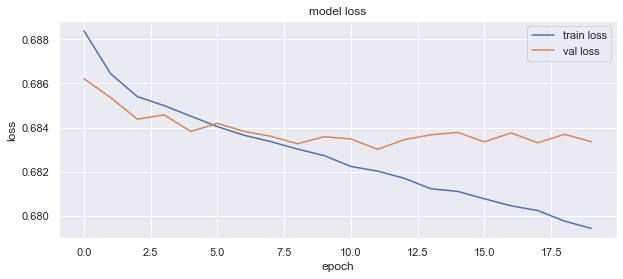

In [20]:
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [135]:
def get_sarima_mape(df, coin):
    # coin_df = df
    coin_df = df.drop(df[df.index.hour != 0].index)
    coin_df.drop(coin_df[coin_df[coin + "_pred"].isna() != 0].index, inplace=True)
    mape = mean_absolute_percentage_error(y_true = coin_df[coin], 
                                      y_pred = coin_df[coin + "_pred"])
    # print('Mape for ', coin, ': ', mape)
    return mape

In [136]:
mape = {}
for coin in tracked_coins:
    mape_coin = get_sarima_mape(df, coin)
    mape[coin] = mape_coin

In [137]:
import statistics
sarima_mape = [x[-1] for x in mape.items()]
average_mape = statistics.fmean(sarima_mape)
print(average_mape)

0.014715068192098894


In [138]:
for coin in tracked_coins:

    df[coin + "_close_log_diff"] = np.log(df[coin]).diff(1)

    df[coin + "_20_SMA"] = df[coin + "_close_log_diff"].shift(1).rolling(window = 500, min_periods = 1).mean()
    df[coin + "_SMA_preds_exp"] = np.exp(df[coin + "_20_SMA"].values)
    df[coin + "_SMA_preds"] = df[coin + "_SMA_preds_exp"] * df[coin + "_1"]

In [142]:
def get_SMA_mape(df, coin):
    # coin_df = df
    coin_df = df.drop(df[df.index.hour != 0].index)
    coin_df.drop(coin_df[coin_df[coin + "_SMA_preds"].isna() != 0].index, inplace=True)
    mape = mean_absolute_percentage_error(y_true = coin_df[coin], 
                                      y_pred = coin_df[coin + "_SMA_preds"])
    # print('Mape for ', coin, ': ', mape)
    return mape

In [143]:
SMA_mape = {}
for coin in tracked_coins:
    SMA_mape_coin = get_SMA_mape(df, coin)
    SMA_mape[coin] = SMA_mape_coin
SMA_mape = [x[-1] for x in SMA_mape.items()]
average_SMA_mape = statistics.fmean(SMA_mape)
print(average_SMA_mape)

0.01449524146038071


In [144]:
def get_lag_mape(df, coin):
    # coin_df = df
    coin_df = df.drop(df[df.index.hour != 0].index)
    coin_df.drop(coin_df[coin_df[coin + "_1"].isna() != 0].index, inplace=True)
    mape = mean_absolute_percentage_error(y_true = coin_df[coin], 
                                      y_pred = coin_df[coin + "_1"])
    # print('Mape for ', coin, ': ', mape)
    return mape

In [145]:
lag_mape = {}
for coin in tracked_coins:
    lag_mape_coin = get_lag_mape(df, coin)
    lag_mape[coin] = lag_mape_coin
lag_mape = [x[-1] for x in lag_mape.items()]
average_lag_mape = statistics.fmean(lag_mape)
print(average_lag_mape)

0.014436160032555745


In [146]:
from sklearn.metrics import accuracy_score

def calculate_signal_accuracy(price_lag, close_price, prediction):

    delta_real = close_price - price_lag
    delta_prediction = prediction - price_lag

    signal_real = np.where(delta_real > 0, 1, 0)
    signal_prediction = np.where(delta_prediction > 0, 1, 0)
    accuracy = accuracy_score(signal_real, signal_prediction)

    return accuracy

In [147]:
df.head()

,DCR,CTSI,BTC,FTM,TRB,MANA,BAT,GXS,STORM,OMG,...,XEM_SMA_preds_exp,XEM_SMA_preds,KNC_close_log_diff,KNC_20_SMA,KNC_SMA_preds_exp,KNC_SMA_preds,LRC_close_log_diff,LRC_20_SMA,LRC_SMA_preds_exp,LRC_SMA_preds
Time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 01:00:00,30.62,NaN,10898.54,0.02711,NaN,0.05071,0.3239,2.093,0.002763,2.514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00,31.10,NaN,10999.70,0.02751,NaN,0.04994,0.3155,2.197,0.002851,2.541,...,NaN,NaN,0.003571,NaN,NaN,NaN,0.007667,NaN,NaN,NaN
2019-07-01 03:00:00,31.28,NaN,11085.91,0.02704,NaN,0.05379,0.3311,2.134,0.002935,2.575,...,1.005813,0.092233,0.009460,0.003571,1.003577,0.253403,0.004536,0.007667,1.007697,0.055413
2019-07-01 04:00:00,31.25,NaN,11086.59,0.02757,NaN,0.04949,0.3305,2.125,0.002827,2.557,...,1.003285,0.092071,0.000784,0.006515,1.006537,0.256566,0.020427,0.006102,1.006120,0.055578
2019-07-01 05:00:00,31.16,NaN,11013.00,0.02739,NaN,0.04945,0.3247,2.120,0.002802,2.516,...,1.009740,0.094774,-0.007476,0.004605,1.004616,0.256277,-0.010878,0.010877,1.010936,0.056997


In [152]:
total_accuracy_lag = []
total_accuracy_SMA = []
total_accuracy_SARIMAX = []
df_accuracy = pd.DataFrame(columns=["accuracy_lag", "accuracy_SMA", "accuracy_SARIMAX","starting_on"], index=tracked_coins)

for coin in tracked_coins:

    coin_df = df.copy()

    coin_df.drop(coin_df[coin_df.index.hour != 0].index, inplace=True)
    coin_df.drop(coin_df[coin_df[coin + "_pred"].isna() != 0].index, inplace=True)

    accuracy_lag = calculate_signal_accuracy(coin_df[coin + "_1"], coin_df[coin], coin_df[coin + "_1"])
    accuracy_SMA = calculate_signal_accuracy(coin_df[coin + "_1"], coin_df[coin], coin_df[coin + "_SMA_preds"])
    accuracy_SARIMAX = calculate_signal_accuracy(coin_df[coin + "_1"], coin_df[coin], coin_df[coin + "_pred"])

    total_accuracy_lag.append(accuracy_lag)
    total_accuracy_SMA.append(accuracy_SMA)
    total_accuracy_SARIMAX.append(accuracy_SARIMAX)

    df_accuracy["accuracy_lag"][coin] = accuracy_lag
    df_accuracy["accuracy_SMA"][coin] = accuracy_SMA
    df_accuracy["accuracy_SARIMAX"][coin] = accuracy_SARIMAX
    df_accuracy["starting_on"][coin] = coin_df.index[0]

df_accuracy.to_csv('accuracy_scores.csv', sep=";", encoding="UTF-8")

In [153]:
print('Toal accuracy based on lag prediction: ', 100*statistics.fmean(total_accuracy_lag),'%')
print('Signal accuracy based on moving average prediction: ', 100*statistics.fmean(total_accuracy_SMA),'%')
print('Signal accuracy based on SARIMAX prediction: ', 100*statistics.fmean(total_accuracy_SARIMAX),'%')

Toal accuracy based on lag prediction:  52.82260199426096 %
Signal accuracy based on moving average prediction:  49.21690422948008 %
Signal accuracy based on SARIMAX prediction:  51.17182633042287 %
